In [3]:
from graphviz import Digraph

class visit_graph:
    def __init__(self):
        self.nodes = {}
        self.visited = None

    def node(self, name):
        name = str(name).upper()
        self.nodes[name] = Node(self, name)

    def edge(self, src, dst):
        src, dst = str(src).upper(), str(dst).upper()
        for name in [src, dst]:
            if not name in self.nodes:
                self.node(name)
        self.nodes[src].children.append(self.nodes[dst])

    def _repr_svg_(self):
        g = Digraph(engine='neato')
        for n in self.nodes:
            g.node(n)
            children = self.nodes[n].children
            for i, child in enumerate(children):
                g.edge(n, child.name, penwidth=str(len(children) - i), len="1.2")
        return g._repr_svg_()
    
    def meetup(self, you, friend):
        # where can you get to?
        you_reach = set()
        self.visited = you_reach
        self.nodes[you].dfs()

        # what about your friend?
        friend_reach = set()
        self.visited = friend_reach
        self.nodes[friend].dfs()

        # take the set intersection
        return you_reach & friend_reach
    
class Node:
    def __init__(self, graph, name):
        self.graph = graph
        self.name = name
        self.children = []

    def __repr__(self):
        return "node %s" % self.name
    
    def dfs(self):
        if self.name in self.graph.visited: 
            return
        self.graph.visited.add(self.name)
        for child in self.children:
            child.dfs()

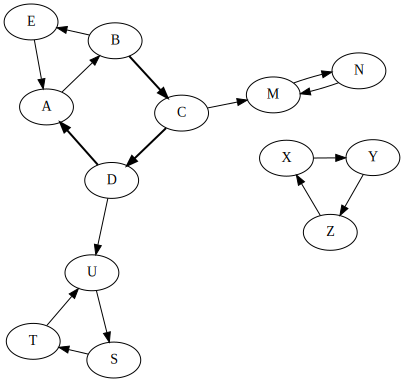

In [4]:
g = visit_graph()
# group 1
g.edge("A", "B")
g.edge("B", "C")
g.edge("C", "D")
g.edge("D", "A")
g.edge("B", "E")
g.edge("E", "A")
# group 2
g.edge("X", "Y")
g.edge("Y", "Z")
g.edge("Z", "X")
# group 3
g.edge("S", "T")
g.edge("T", "U")
g.edge("U", "S")
# group 4
g.edge("M", "N")
g.edge("N", "M")
# connections from group 1 to 3 and 4
g.edge("D", "U")
g.edge("C", "M")

g

In [7]:
g.meetup("S", "T")

{'S', 'T', 'U'}

In [8]:
g.meetup("A", "T")

{'S', 'T', 'U'}

In [9]:
g.meetup("A", "N")

{'M', 'N'}

In [10]:
g.meetup("U", "M")

set()

In [11]:
g.meetup("A", "B")

{'A', 'B', 'C', 'D', 'E', 'M', 'N', 'S', 'T', 'U'}